<a href="https://colab.research.google.com/github/wedexyz/eeg-/blob/main/trainingCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import time

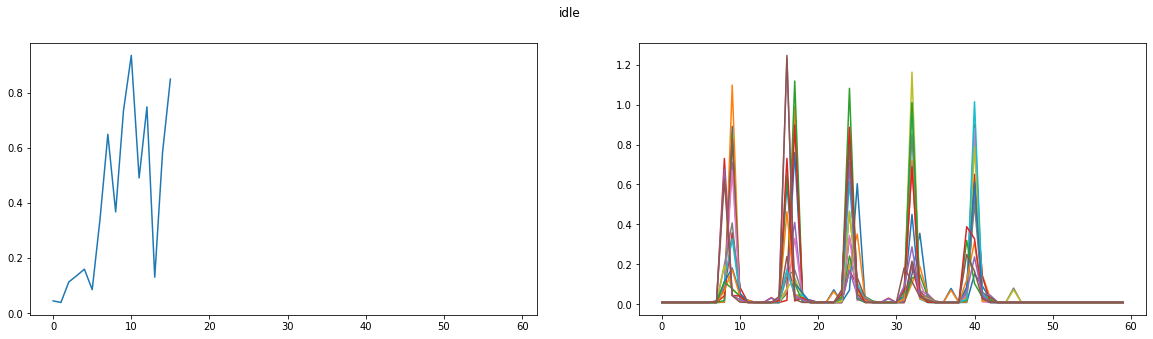

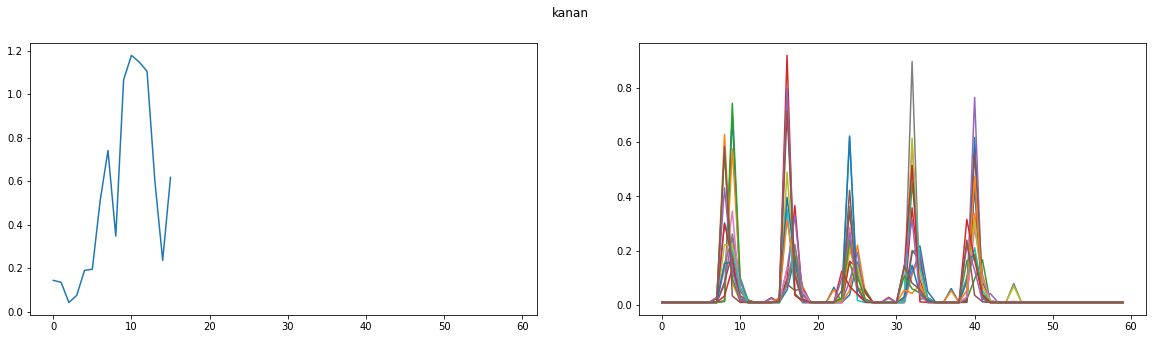

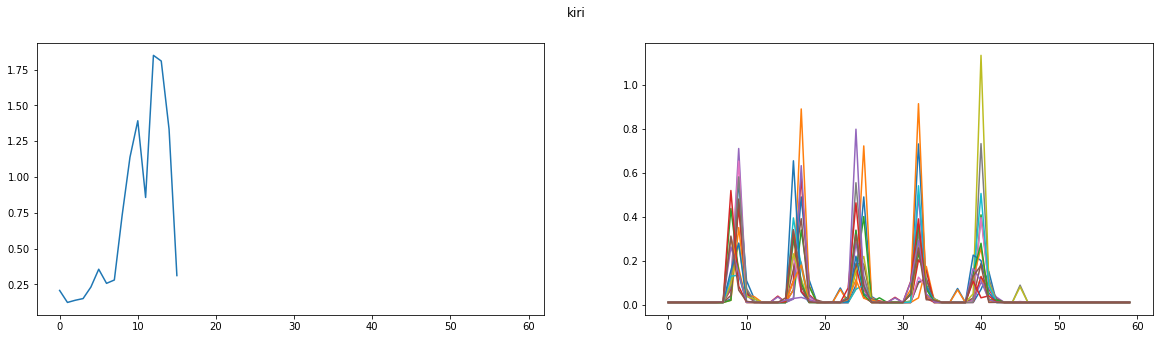

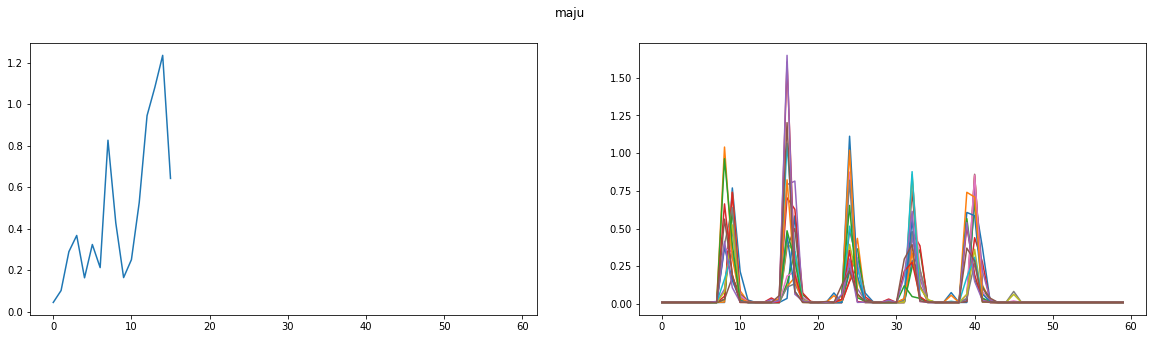

In [87]:
idle = np.load("/content/drive/My Drive/Colab Notebooks/data_baru/idle/1604315006.npy")
kanan = np.load("/content/drive/My Drive/Colab Notebooks/data_baru/kanan/1604315180.npy")
kiri = np.load("/content/drive/My Drive/Colab Notebooks/data_baru/kiri/1604315126.npy")
maju = np.load("/content/drive/My Drive/Colab Notebooks/data_baru/maju/1604315069.npy")

fig, (ax1, ax2) =  plt.subplots( ncols=2, sharex=True,figsize=(20, 5))
fig.suptitle('idle')
ax1.plot(idle[0][16])
ax2.plot(idle[175])

fig, (ax3, ax4) =  plt.subplots( ncols=2, sharex=True,figsize=(20, 5))
fig.suptitle('kanan')
ax3.plot(kanan[0][16])
ax4.plot(kanan[175])

fig, (ax5, ax6) =  plt.subplots( ncols=2, sharex=True,figsize=(20, 5))
fig.suptitle('kiri')
ax5.plot(kiri[0][16])
ax6.plot(kiri[175])

fig, (ax7, ax8) =  plt.subplots( ncols=2, sharex=True,figsize=(20, 5))
fig.suptitle('maju')
ax7.plot(maju[0][16])
ax8.plot(maju[175])



plt.show()

In [88]:
ACTIONS = ["kiri", "maju","idle","kanan"]
reshape = (-1,16, 60,1)


def create_data(starting_dir="=/content/drive/My Drive/Colab Notebooks/data_baru"):
    training_data = {}
    for action in ACTIONS:
        if action not in training_data:
            training_data[action] = []
        data_dir = os.path.join(starting_dir,action)
        for item in os.listdir(data_dir):
            data = np.load(os.path.join(data_dir, item))
            for item in data:
                training_data[action].append(item)

    lengths = [len(training_data[action]) for action in ACTIONS]
    print(lengths)

    for action in ACTIONS:
        np.random.shuffle(training_data[action])  
        training_data[action] = training_data[action][:min(lengths)]

    lengths = [len(training_data[action]) for action in ACTIONS]
    print(lengths)
    combined_data = []
    for action in ACTIONS:
        for data in training_data[action]:
            if action == "kiri":
                combined_data.append([data, [1, 0, 0,0]])
            elif action == "maju":
                combined_data.append([data, [0, 1, 0, 0]])
            elif action == "idle":
                combined_data.append([data, [0, 0, 1, 0]])
            elif action == "kanan":
                combined_data.append([data, [0, 0, 0, 1]])

    np.random.shuffle(combined_data)
    print("length:",len(combined_data))
    return combined_data


In [89]:
print("creating training data")
traindata = create_data(starting_dir="/content/drive/My Drive/Colab Notebooks/data_baru")
train_X = []
train_y = []
for X, y in traindata:
    train_X.append(X)
    train_y.append(y)



creating training data
[1000, 1000, 1000, 1000]
[1000, 1000, 1000, 1000]
length: 4000


In [90]:
print("creating testing data")
testdata = create_data(starting_dir="/content/drive/MyDrive/Colab Notebooks/tes_data")
test_X = []
test_y = []
for X, y in testdata:
    test_X.append(X)
    test_y.append(y)
print(len(train_X))
print(len(test_X))
print(np.array(train_X).shape)


train_X = np.array(train_X).reshape(reshape)
test_X = np.array(test_X).reshape(reshape)

train_y = np.array(train_y)
test_y = np.array(test_y)




creating testing data
[250, 250, 250, 250]
[250, 250, 250, 250]
length: 1000
4000
1000
(4000, 60, 16)


In [91]:

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (7,7), padding = "same", activation = "relu", input_shape=train_X.shape[1:]))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", activation = "relu",input_shape=train_X.shape[1:]))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu",input_shape=train_X.shape[1:]))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation = "sigmoid"))

adam = Adam(lr = 0.0001)
model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 16, 60, 64)        3200      
_________________________________________________________________
batch_normalization_35 (Batc (None, 16, 60, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 60, 64)        102464    
_________________________________________________________________
batch_normalization_36 (Batc (None, 16, 60, 64)        256       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 60, 64)        36928     
_________________________________________________________________
batch_normalization_37 (Batc (None, 16, 60, 64)        256       
_________________________________________________________________
flatten_8 (Flatten)          (None, 61440)            

In [92]:
epochs = 100
batch_size = 16

history = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, validation_data=(test_X, test_y))
score = model.evaluate(test_X, test_y, batch_size=batch_size)
MODEL_NAME = f"CNN_model/{round(score[1]*100,2)}-acc-64x3-batch-norm-{epochs}epoch-{int(time.time())}-loss-{round(score[0],2)}.model"
model.save(MODEL_NAME)




Epoch 1/100
250/250 [==============================] - 2s 7ms/step - loss: 0.7707 - accuracy: 0.2645 - mse: 0.2768 - val_loss: 0.7491 - val_accuracy: 0.2500 - val_mse: 0.2741
Epoch 2/100
250/250 [==============================] - 2s 6ms/step - loss: 0.6998 - accuracy: 0.3285 - mse: 0.2496 - val_loss: 0.8170 - val_accuracy: 0.2740 - val_mse: 0.2994
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 0.6402 - accuracy: 0.4200 - mse: 0.2237 - val_loss: 0.5838 - val_accuracy: 0.5250 - val_mse: 0.2018
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5752 - accuracy: 0.5150 - mse: 0.1965 - val_loss: 0.8167 - val_accuracy: 0.5020 - val_mse: 0.2797
Epoch 5/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5427 - accuracy: 0.5555 - mse: 0.1833 - val_loss: 0.4562 - val_accuracy: 0.5840 - val_mse: 0.1478
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4946 - accuracy: 0.6152 - mse: 0.1643 - val_loss

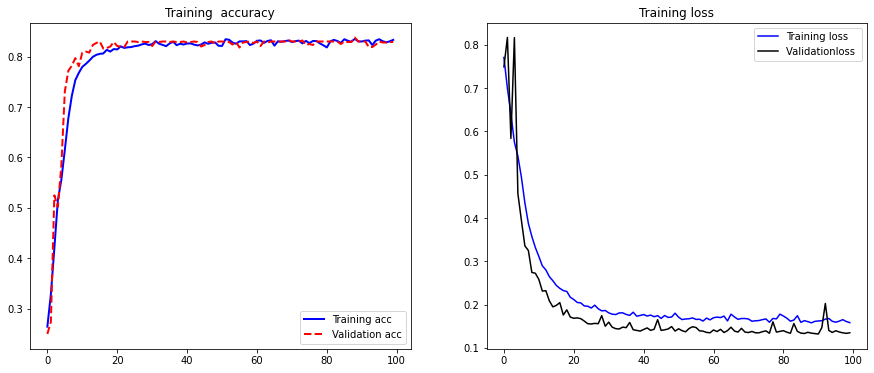

In [93]:


def plot_training_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc',linewidth=2)
    plt.plot(epochs, val_acc, 'r--', label='Validation acc',linewidth=2)
    plt.title('Training  accuracy')
    plt.legend()
 
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'k', label='Validationloss ')
    plt.title('Training loss')
    plt.legend()
 
    plt.show()
plot_training_history(history)

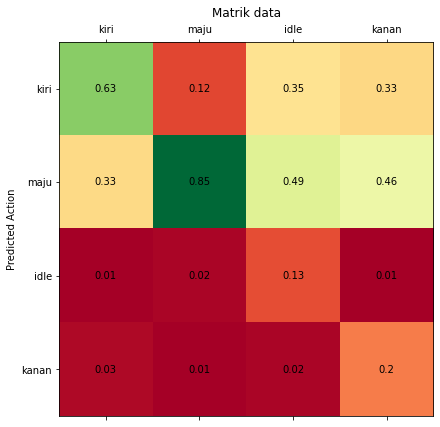

In [96]:
MODEL_NAME = MODEL_NAME
CLIP = True  # if your model was trained with np.clip to clip  values
CLIP_VAL = 10  # if above, what was the value +/-

model = tf.keras.models.load_model(MODEL_NAME)

VALDIR = '/content/drive/MyDrive/Colab Notebooks/data_baru'
ACTIONS =  ["kiri", "maju","idle","kanan"]
PRED_BATCH = 16


def get_val_data(valdir, action, batch_size):

    argmax_dict = {0: 0, 1: 0, 2: 0,3:0}
    raw_pred_dict = {0: 0, 1: 0, 2: 0,3:0}

    action_dir = os.path.join(valdir, action)
    for session_file in os.listdir(action_dir):
        filepath = os.path.join(action_dir,session_file)
        if CLIP:
            data = np.clip(np.load(filepath), -CLIP_VAL, CLIP_VAL) / CLIP_VAL
        else:
            data = np.load(filepath) 
        preds = model.predict([data.reshape(-1, 16, 60,1)], batch_size=batch_size)

        for pred in preds:
            argmax = np.argmax(pred)
            argmax_dict[argmax] += 1
            for idx,value in enumerate(pred):
                raw_pred_dict[idx] += value

    argmax_pct_dict = {}

    for i in argmax_dict:
        total = 0
        correct = argmax_dict[i]
        for ii in argmax_dict:
            total += argmax_dict[ii]
        argmax_pct_dict[i] = round(correct/total, 4)
    return argmax_dict, raw_pred_dict, argmax_pct_dict


def make_conf_mat(left,forward, none, right):
    action_dict = {"kiri": left, "maju": forward, "idle":none,"kanan": right}
    action_conf_mat = pd.DataFrame(action_dict)
    actions = [i for i in action_dict]

    fig = plt.figure(figsize=(15, 6))
   
    ax = fig.add_subplot(111)
    
    ax.matshow(action_conf_mat, cmap=plt.cm.RdYlGn)
    ax.set_xticklabels([""]+actions)
    ax.set_yticklabels([""]+actions)

    #print("__________")
    #print(action_dict)
    for idx, i in enumerate(action_dict):
        #print('tf',i)
        for idx2, ii in enumerate(action_dict[i]):
            #print(i, ii)
            #print(action_dict[i][ii])
            ax.text(idx, idx2, f"{round(float(action_dict[i][ii]),2)}", va='center', ha='center')
    # Rotate the tick labels and set their alignment.
    
    plt.title("Matrik data")
    plt.ylabel("Predicted Action")
    fig.tight_layout()
    plt.show()


left_argmax_dict, left_raw_pred_dict, left_argmax_pct_dict = get_val_data(VALDIR, "kiri", PRED_BATCH)
forward_argmax_dict, forward_raw_pred_dict, forward_argmax_pct_dict = get_val_data(VALDIR, "maju", PRED_BATCH)
none_argmax_dict, none_raw_pred_dict, none_argmax_pct_dict = get_val_data(VALDIR, "idle", PRED_BATCH)
right_argmax_dict, right_raw_pred_dict, right_argmax_pct_dict = get_val_data(VALDIR, "kanan", PRED_BATCH)
make_conf_mat(left_argmax_pct_dict,forward_argmax_pct_dict, none_argmax_pct_dict, right_argmax_pct_dict)